# CI Portfolio Project 5 - Filter Maintenance Predictor 2022
## **Data Cleaning Notebook**

## Objectives

*   Confirm / Evaluate missing data
*   Clean data in preparation for analysis

### Inputs

1. Test Dataset : `outputs/datasets/collection/PredictiveMaintenanceTest.csv`

2. Train Dataset : `outputs/datasets/collection/PredictiveMaintenanceTrain.csv`

### Outputs

* Generate cleaned Train and Test sets, both saved under `outputs/datasets/cleaned`

### Conclusions

  * Data Cleaning Pipeline
  * Drop Variables as Required
  <!-- `['customerID', 'TotalCharges' ]` -->

---

# Change working directory

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/filter-maintenance-predictor/jupyter_notebooks'

In [2]:
os.chdir(os.path.dirname(current_dir))
print("Current directory set to new location")

Current directory set to new location


In [3]:
current_dir = os.getcwd()
current_dir

'/workspace/filter-maintenance-predictor'

---

# Load Collection Data

In [99]:
import pandas as pd
df_train = pd.read_csv(f'outputs/datasets/collection/PredictiveMaintenanceTrain.csv')
df_test = pd.read_csv(f'outputs/datasets/collection/PredictiveMaintenanceTest.csv')

In [100]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39420 entries, 0 to 39419
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Data_No                39420 non-null  int64  
 1   Differential_pressure  39420 non-null  float64
 2   Flow_rate              39420 non-null  float64
 3   Time                   39420 non-null  float64
 4   Dust_feed              39420 non-null  float64
 5   Dust                   39420 non-null  float64
 6   change_DP              39420 non-null  float64
 7   Mass_g                 39420 non-null  float64
 8   Cumulative_Mass_g      39420 non-null  float64
 9   Tt                     39420 non-null  float64
 10  Filter_Balance         39420 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 3.3 MB


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39414 entries, 0 to 39413
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Data_No                39414 non-null  int64  
 1   Differential_pressure  39414 non-null  float64
 2   Flow_rate              39414 non-null  float64
 3   Time                   39414 non-null  float64
 4   Dust_feed              39414 non-null  float64
 5   Dust                   39414 non-null  float64
 6   RUL                    39414 non-null  float64
 7   change_DP              39414 non-null  float64
 8   Mass_g                 39414 non-null  float64
 9   Cumulative_Mass_g      39414 non-null  float64
 10  Tt                     39414 non-null  float64
 11  Filter_Balance         39414 non-null  float64
dtypes: float64(11), int64(1)
memory usage: 3.6 MB


---

# Data Exploration

### Check for Missing Data

To confirm we don't have variables with missing data, and if we do; discover their distribution and shape.
* Note: we are aware that the **df_train** dataset does not have values for `RUL`, so both sets are checked separately

If we tried to combine the sets to check, it would indicate `RUL` has missing values like so: 

In [7]:
df_total = pd.concat([df_train, df_test])
vars_with_missing_data = df_total.columns[df_total.isna().sum() > 0].to_list()
vars_with_missing_data

['RUL']

#### To check both datasets for missing data at the same time

Define a handy function to identify which dataframe

In [8]:
def name_dataframe(data):
    """ To identify which dataframe is being accessed """
    name =[n for n in globals() if globals()[n] is data][0]
    print('Dataframe name: %s' % name)

Check for missing data & return error information if there is

In [9]:
from pandas_profiling import ProfileReport

for df in (df_train, df_test):
    vars_with_missing_data = df.columns[df.isna().sum() > 0].to_list()
    if vars_with_missing_data:
        profile = ProfileReport(df=df[vars_with_missing_data], minimal=True)
        profile.to_notebook_iframe()
    else:
        name_dataframe(df)
        print('There are no variables with missing data')

Dataframe name: df_train
There are no variables with missing data
Dataframe name: df_test
There are no variables with missing data


---

## Outliers in differential pressure observations

In each bin we notice that the change_DP measure, the size and direction of first few observations indicated they may be outliers. We have considered three main methods to deal with outliers:
* Dropping the outliers.
* Winsorize method.
* Log transformation.

In [32]:
df_bin = df_train[df_train['Data_No'] == 46]
df_bin

,Data_No,Differential_pressure,Flow_rate,Time,Dust_feed,Dust,change_DP,Mass_g,Cumulative_Mass_g,Tt,Filter_Balance
36255,46,0.0000,16.405323,0.1,118.214472,0.9,0.0000,0.106393,0.106393,62.6,100.00
36256,46,0.0000,57.143613,0.2,118.214472,0.9,0.0000,0.106393,0.212786,62.6,100.00
36257,46,0.0000,72.582310,0.3,118.214472,0.9,0.0000,0.106393,0.319179,62.6,100.00
36258,46,0.0000,78.469081,0.4,118.214472,0.9,0.0000,0.106393,0.425572,62.6,100.00
36259,46,0.0000,81.170562,0.5,118.214472,0.9,0.0000,0.106393,0.531965,62.6,100.00
...,...,...,...,...,...,...,...,...,...,...,...
36876,46,573.0975,83.455030,62.2,118.214472,0.9,8.4997,0.106393,66.176461,62.6,4.48
36877,46,580.6930,83.219026,62.3,118.214472,0.9,7.5955,0.106393,66.282854,62.6,3.22
36878,46,589.8257,83.005263,62.4,118.214472,0.9,9.1327,0.106393,66.389247,62.6,1.70
36879,46,596.0648,83.209944,62.5,118.214472,0.9,6.2391,0.106393,66.495640,62.6,0.66


Plot of Bin 46 change in Differential Pressure

/tmp/ipykernel_758/1054317075.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df_bin['change_DP'])


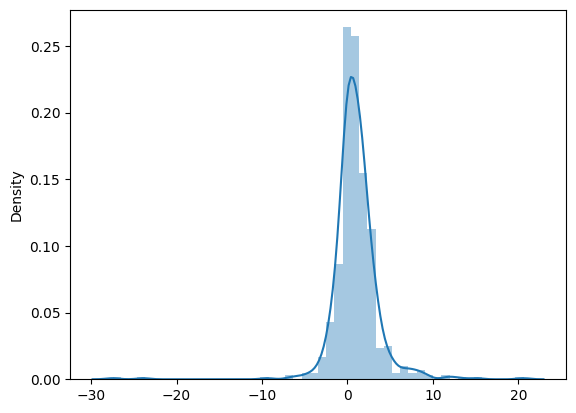

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

df_bin = df_train[df_train['Data_No'] == 46]
# sns.boxplot(x = df_bin['change_DP'])
# sns.stripplot(x = df_bin['change_DP'])
# sns.swarmplot(x = df_bin['change_DP'])
sns.distplot(x = df_bin['change_DP'])
# sns.barplot(x = df_bin['change_DP'])
# sns.relplot(x = df_bin['change_DP'], kind='line')
# sns.scatterplot(x = df_bin['change_DP'])
# sns.histplot(x = df_bin['change_DP'])
plt.show()

### Logarithmic Transformation of Differential Pressure

As seen at data collection, the original continuous `differential_pressure` data is right or **positively skewed** at 1.81 and does not follow the shape of a normally distributed bell curve.

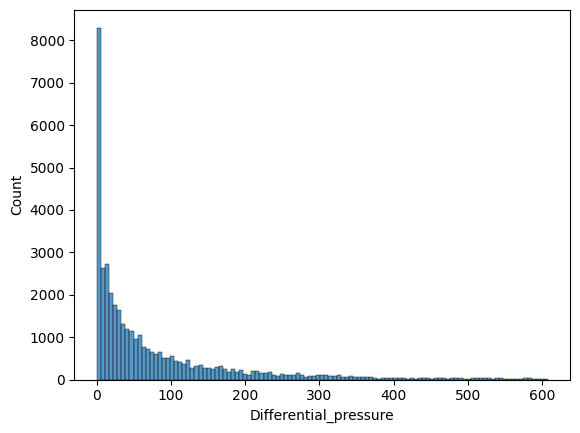

In [12]:
import numpy as np
sns.histplot(x = df_train['Differential_pressure'])
plt.show()

A log transformation of this data to make it as “normal” as possible so that the statistical analysis results from this data become more valid.

/workspace/.pip-modules/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


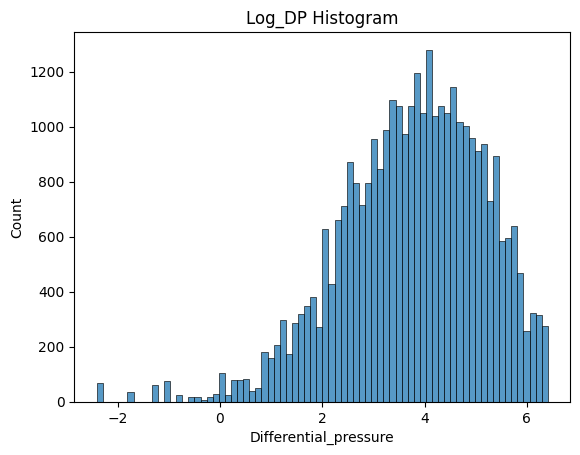

In [93]:
df_train_log = df_train['Differential_pressure']
log_dp = np.log(df_train_log)

sns.histplot(x = log_dp)
# sns.boxplot(x = log_dp)
plt.title('Log_DP Histogram')
plt.show()

In [14]:
log_dp.to_frame()

,Differential_pressure
0,-inf
1,-inf
2,-inf
3,-inf
4,-inf
...,...
39415,5.886026
39416,5.888284
39417,5.890287
39418,5.891786


#### The Winsorize Method
Winsorization is the process of replacing the extreme values of statistical data in order to limit the effect of the outliers on the calculations or the results obtained by using that data. To apply this to a our `differential_pressure` variable, where outliers are present only at one end of the data:

In [106]:
from scipy.stats.mstats import winsorize

WinsorizedArrayMean = np.mean(df_train['Differential_pressure'])
print(WinsorizedArrayMean)

47.94392004387463


The lower 10% values of the data will have their values set equal to the value of the data point at the 10th percentile.

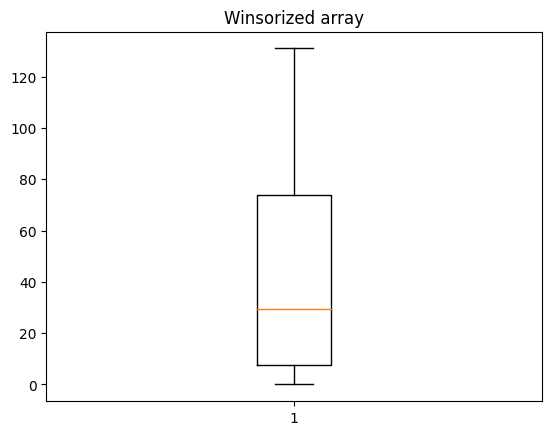

In [107]:
WinsorizedArray = winsorize(df_train['Differential_pressure'],(0.1,0.1))
plt.boxplot(WinsorizedArray)
plt.title('Winsorized array')
plt.show()

In [108]:
WinsorizedArrayNewMean = np.mean(WinsorizedArray)
print(WinsorizedArrayNewMean)

44.74244679879244


#### Selecting the outliers to drop
* Removing Negative Values
* Detecting the outliers using IQR and removing them.

In [15]:
type(log_dp)

pandas.core.series.Series

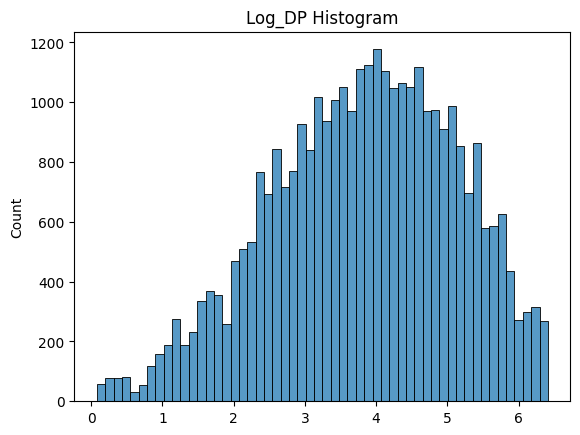

In [16]:
log_dp_hist = [element for element in log_dp if element > 0]

sns.histplot(x = log_dp_hist)
plt.title('Log_DP Histogram')
plt.show()

In [17]:
type(log_dp_hist)

list

In [18]:
mySeries = pd.Series(log_dp_hist)
type(mySeries)

pandas.core.series.Series

In [102]:
df_train_IQR = df_train

# IQR
Q1 = np.percentile(df_train_IQR, 25, method='midpoint')
Q3 = np.percentile(df_train_IQR, 75,method='midpoint')
IQR = Q3 - Q1
print("Old Shape: ", df_train_IQR.shape)
 
# Upper bound
upper = np.where(df_train_IQR >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df_train_IQR <= (Q1-1.5*IQR))
 
''' Removing the Outliers '''
df_train_IQR.drop(upper[0], inplace = True)
df_train_IQR.drop(lower[0], inplace = True)
 
print("New Shape: ", df_train_IQR.shape)

Old Shape:  (39420, 11)
New Shape:  (29688, 11)


/workspace/.pip-modules/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


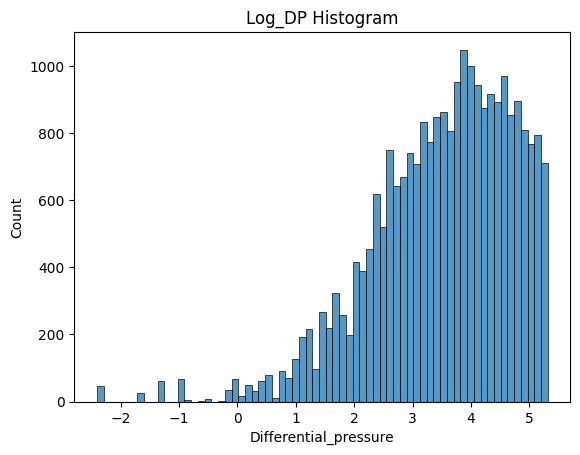

In [105]:
df_train_log = df_train_IQR['Differential_pressure']
log_dp = np.log(df_train_log)
df_train_IQR['log_DP'] = log_dp
sns.histplot(x = log_dp)
plt.title('Log_DP Histogram')
plt.show()

In [ ]:
# # IQR
# Q1 = np.percentile(df_train['Differential_pressure'], 25,
#                    method='midpoint')
 
# Q3 = np.percentile(df_train['Differential_pressure'], 75,
#                    method='midpoint')
# IQR = Q3 - Q1
 
# print("Old Shape: ", df_train.shape)
 
# # Upper bound
# upper = np.where(df_train['Differential_pressure'] >= (Q3+1.5*IQR))
# # Lower bound
# lower = np.where(df_train['Differential_pressure'] <= (Q1-1.5*IQR))
 
# ''' Removing the Outliers '''
# df_train.drop(upper[0], inplace = True)
# df_train.drop(lower[0], inplace = True)
 
# print("New Shape: ", df_train.shape)

---

## Evenly distribute dataset by `Dust` type

Both the train and test sets supplied have data distributed unevenly between 50 test bins. To account for this we wish to assess the measures of central tendency for each Dust class, with the aim of reducing the data size to a more evenly proportioned one between classes.

#### **Train** Dataset

**Considerations**

* The proportion of data that **has reached filter failure** is represented by how close `filter_balance` is to zero or less. 
    * Data with filter_balance values approaching zero may be worth keeping and will make part of our heuristic decision process.
* Notwithstanding that the **mean** is the most frequently used measure of central tendency because it uses all values in the data set to give you an average
    * For data from skewed distributions (like `differential_pressure`), the **median** is better than the mean because it isn’t influenced by extremely large values.

In the following calculation, we see a summary of the top ten `Data_No` bins where `differential_pressure` observations that have made it to the **600 Pa** (the point of filter failure).

In [ ]:
last_row_train = df_train[df_train.Data_No != df_train.Data_No.shift(-1)]
# last_row_descending = last_row_train.sort_values(by='Dust', ascending=True)
last_row_descending = last_row_train.sort_values(by='Differential_pressure', ascending=False)
last_row_descending.head(n=10)

Note the diagram below showing proportions of `Dust` variable in the **df_train** dataset.
* It shows a disproportionate mix between classes. This will be the first dataset we tidy up.

In [ ]:
%matplotlib inline

category_totals = df_train.groupby('Dust')['Differential_pressure'].count().sort_values()
category_totals.plot(kind="barh", title='Proportion of Dust Classes in df_train\n', xlabel='\nObservations', ylabel='Dust Class')
category_totals

---

## Represent Central Tendency

#### Our next aim is to 
* Fill these bins with data that best represents a central tendency.
* Make the size of each bin around **9400** observations (similar to the A4 Coarse Dust class bin) 

#### Procedure
* Include a comparison to how far each `differential_pressure` measure **deviates** or how far it is from the **.median()** value of the bin.
* Ordered by `filter_balance` showing sets with data closest to 600 Pa `differential_pressure`.
* Include comparison to median
* Add a cumulative measure of Data_No's to use as a ranking
* Create a dataframe of the A3 Medium Dust : **1.025**

Add a calculation of Standard Deviation to **df_train** test set

In [ ]:
std_group = df_train.groupby('Data_No').std()
std_group.index.name = None
std_group['Data_No'] = std_group.index
map_std = df_train['Data_No'].map(std_group.set_index('Data_No')['Differential_pressure'])
df_train['std_DP'] = map_std
# df_test.loc[363:368]
df_train.loc[446:451]

Add a calculation of Coefficient of Variation (variance) to **df_train** test set

In [ ]:
import numpy as np
cv = lambda data: np.std(data, ddof=1) / np.mean(data, axis=0) * 100 
var_group = df_train.groupby('Data_No').apply(cv)
var_group.index.name = None
var_group['Data_No'] = var_group.index
map_var = df_train['Data_No'].map(var_group.set_index('Data_No')['Differential_pressure'])
df_train['cv_DP'] = map_var
# df_test.loc[363:368]
df_train.loc[446:451]

The coefficient of variation is an indication of how far the standard deviation is away from the mean. As we can see it does not add value to our understanding of the data, primarily due the the skewed nature of the `differential_pressure` continuous variable. 
* This re-enforces the understanding that descriptive statistics using the mean may not be preferred measure of central tendency.

**Remove Coefficient of Variation and Add Median to df_train**
* Median is the preferred measure of central tendency to observe in a skewed dataset such as this as it is not as affected by larger values.

In [ ]:
del df_train['cv_DP']
median_group = df_train.groupby('Data_No').median()
median_group.index.name = None
median_group['Data_No'] = median_group.index
map_median = df_train['Data_No'].map(median_group.set_index('Data_No')['Differential_pressure'])
df_train['median_DP'] = map_median
df_train.loc[446:452]

---

#### Review the dataframe with just **A3 Dust** in it, ordered by `filter_balance` as a measure of time to filter failure

Map the size of each bin

In [ ]:
bin_sum = df_train.groupby('Data_No')['Data_No'].count().reset_index(name='bin_Tot')
map_bin = df_train['Data_No'].map(bin_sum.set_index('Data_No')['bin_Tot'])
df_train['bin_Size'] = map_bin
# df_train.loc[38817:38827]

Include a cumulative sum of each **bin size**. This will help us decide on the data bin that reaches **9400** or more total values.

In [ ]:
dust_A3 = df_train[df_train['Dust'] == 1.025]
filter_A3 = dust_A3[dust_A3.Data_No != dust_A3.Data_No.shift(-1)]
df_train_A3 = filter_A3.sort_values(by='Filter_Balance', ascending=True)
df_train_A3['c_Sum'] = df_train_A3['bin_Size'].cumsum()
df_train_A3.head(13)

We can see that in the current dataframe containing only A3 Medium Dust observations, that is ordered by those tests with closest to a completed test to failure:
* **The top 12 data bins (seen at bin 21) would extract a A3 Medium dust training dataset with 9,764 observations**
* We will now perform a further PDA to evaluate the suitability of these further

#### Rank by Standard Deviations, ordered by `std_DP`
The standard deviation is used to measure the spread of values in a sample.

In [ ]:
# dust_A3 = df_train[df_train['Dust'] == 1.025]
# filter_A3 = dust_A3[dust_A3.Data_No != dust_A3.Data_No.shift(-1)]
df_train_A3_std = filter_A3.sort_values(by='std_DP', ascending=True)
df_train_A3_std['c_Sum'] = df_train_A3_std['bin_Size'].cumsum()
df_train_A3_std.head(15)

#### Rank by central tenancy of the Median value, ordered by `median_DP`
* the value of the number in the middle of the dataset

In [ ]:
# dust_A3 = df_train[df_train['Dust'] == 1.025]
# filter_A3 = dust_A3[dust_A3.Data_No != dust_A3.Data_No.shift(-1)]
df_train_A3_median = filter_A3.sort_values(by='median_DP', ascending=True)
df_train_A3_median['c_Sum'] = df_train_A3_median['bin_Size'].cumsum()
df_train_A3_median.head(14)

#### Considerations
* T...

---

### Extract these bins from the df_train dataset

Make a separate frame indicating the bin numbers we wish to extract

In [ ]:
bin_no = df_train_A3['Data_No'].head(12)
bin_no.to_frame()

Use these references to create a dataframe `df_train_cleaned_A3` that is ready for inclusion in our final dataframe `df_train_clean`.
* Note we disregard the cumulative sum measure as it doesn't add value to further calculations

In [ ]:
df_train_copy = df_train
df_train_cleaned_A3 = df_train_copy[df_train_copy['Data_No'].isin(bin_no)]
df_train_cleaned_A3

#### A Quick Review: 
* The Shape we started with

In [ ]:
dust_A3.shape

Shape we have now

In [ ]:
df_train_cleaned_A3.shape

In [ ]:
%matplotlib inline

category_totals = df_train.groupby('Dust')['Differential_pressure'].count().sort_values()
category_totals.plot(kind="barh", title='Proportion of Dust Classes in df_train\n', xlabel='\nObservations', ylabel='Dust Class')
category_totals

### Repeat the cleaning with the next largest set of bins: **A2 Fine Dust**

---

In [ ]:
df_train_A3.describe()

In [ ]:
df_train_A3.median()

Go through each data bin in this dust class and calculate the .median() values

In [ ]:
# df_train.std()
df_train.median()

In [ ]:
df_bin = df_train[df_train['Data_No'] == '12']
# df_bin.median().round(decimals=2)
df_bin

How far the measure is from the median?

In [ ]:
df_train.describe()

### Extract each class and compare distributions

---

#### **Test** dataset

In [ ]:
last_row_test = df_test[df_test.Data_No != df_test.Data_No.shift(-1)]
last_row_descending = last_row_test.sort_values(by='Differential_pressure', ascending=False)
last_row_descending.head(n=10)

Check dataframe distributions

In [ ]:
for df in (df_train, df_test):
    df_numpy = df
    df_numpy.to_numpy()
    name_dataframe(df_numpy)
    print(df_numpy.shape)

---

# Correlation and Power Predictive Score Analysis

---

## Save Datasets

Save the files to /cleaned folder

In [ ]:
import os
try:
  os.makedirs(name='outputs/datasets/cleaned')
except Exception as e:
  print(e)

df_train.to_csv(f'outputs/datasets/cleaned/dfCleanTrain.csv',index=False)
df_test.to_csv(f'outputs/datasets/cleaned/dfCleanTest.csv',index=False)

---

# Conclusions and Next steps

#### Conclusions: 
* 

#### Next Steps:
* Correlation Study
* Feature Engineering

---